In [1]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from src.feature_selection import do_forward_selection_cv

In [2]:
# '\s+' tells pandas to use any spaces as the delimiter instead of ,
train_df = pd.read_csv("../data/train.2024.04.16.csv")
feature_col_names = np.array(['F01', 'F02', 'F03', 'F04',
       'F05', 'F06', 'F07', 'F08', 'F09', 'F10', 'F11', 'F12', 'F13'])

In [3]:
all_feats_df = train_df[~np.any(np.isnan(train_df[feature_col_names]), axis=1)]
X = all_feats_df[feature_col_names].to_numpy()
y = all_feats_df["y"].to_numpy()

In [4]:
model = LDA()
pipeline = Pipeline([('scaler', StandardScaler()), ('m', model)])
scoring_method ='f1_macro'
larger_score_is_better = True
cv_random_state=2652124

In [5]:
def plot_sequential_selected_feature_scores(ids_scores, 
                                            feature_names, 
                                            base_set_name="None",
                                            title="CV $R^2$ Ranges for Selected Features",
                                            savefigname=None):
    feat_plot_names = np.concatenate([[base_set_name], feature_names])
    x = np.arange(ids_scores.shape[0])
    fig, ax = plt.subplots(1, constrained_layout=True, figsize=(4, 3))
    ax.fill_between(x, ids_scores[:, 1], ids_scores[:, 2], color='gray', 
                     alpha=0.5, label='CV range')
    ax.plot(x, ids_scores[:, 0], color='k', marker='x', label='CV mean')
    ax.set_xticks(x, feat_plot_names, rotation=90)
    ax.set_xlabel("Added Feature")
    ax.set_ylabel("CV F1 Score (Macro)")
    ax.legend(loc='lower right')
    ax.set_title(title)
    ax.grid(axis='y')
    if savefigname is not None:
        fig.savefig(savefigname, dpi=300)
    print(fig.get_size_inches())

In [6]:
cv_outer = RepeatedStratifiedKFold(n_splits=10, 
                        n_repeats=2, 
                        random_state=cv_random_state)

In [7]:
feature_ids = np.arange(13)
feature_ids


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [8]:
ids, ids_scores, all_scores = do_forward_selection_cv(X,
                                                    y,
                                                    feature_ids, 
                                                    cv_outer,
                                                    pipeline,
                                                    scoring_method,
                                                    larger_score_is_better=larger_score_is_better,
                                                    verbose=True,
                                                    n_jobs=10)

0 0.4362499152214402
1 0.4051047558627351
2 0.378984522659184
3 0.5081622506845462
4 0.43843008387491567
5 0.5847829976270027
6 0.593630178253482
7 0.3945922344155118
8 0.6326273591533108
9 0.5188110064732878
10 0.4930186939082847
11 0.611324060474443
12 0.6706983977065454
[12  0] 0.7537208658731684
[12  1] 0.6752211394858403
[12  2] 0.6658866714157757
[12  3] 0.7492979694243302
[12  4] 0.7176318331223518
[12  5] 0.7413104965100799
[12  6] 0.780212123497628
[12  7] 0.7173789949249805
[12  8] 0.7472452050656924
[12  9] 0.751254269660648
[12 10] 0.7519688989241384
[12 11] 0.6613257089122696
[12  6  0] 0.868183764219365
[12  6  1] 0.8324802361890036
[12  6  2] 0.8248079177611327
[12  6  3] 0.7912456364517892
[12  6  4] 0.818101432843911
[12  6  5] 0.8001145561978475
[12  6  7] 0.787785553014249
[12  6  8] 0.8183578810697615
[12  6  9] 0.8052330781407024
[12  6 10] 0.799990288243718
[12  6 11] 0.7937032158037653
[12  6  0  1] 0.882403302978035
[12  6  0  2] 0.8947410122001835
[12  6  0  3]

[4. 3.]


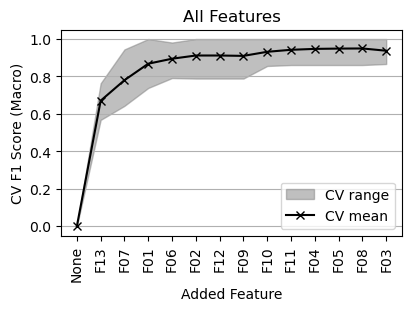

In [9]:
plot_sequential_selected_feature_scores(ids_scores,
                                        feature_col_names[ids],
                                        title="All Features")

In [10]:
feature_ids = np.delete(np.arange(X.shape[1]), [0, 6, 8, 9, 12])
ids, ids_scores, all_scores = do_forward_selection_cv(X,
                                                    y,
                                                    feature_ids, 
                                                    cv_outer,
                                                    pipeline,
                                                    scoring_method,
                                                    larger_score_is_better=larger_score_is_better,
                                                    verbose=True,
                                                    n_jobs=10)

1 0.4051047558627351
2 0.378984522659184
3 0.5081622506845462
4 0.43843008387491567
5 0.5847829976270027
7 0.3945922344155118
10 0.4930186939082847
11 0.611324060474443
[11  1] 0.6323048126149203
[11  2] 0.615204088728847
[11  3] 0.7173767237352462
[11  4] 0.6963177209116316
[11  5] 0.7182125300457434
[11  7] 0.6773596592323835
[11 10] 0.7185088883572631
[11 10  1] 0.7300368549459342
[11 10  2] 0.7259137961920656
[11 10  3] 0.7432480708075125
[11 10  4] 0.73568672547273
[11 10  5] 0.7551896748865835
[11 10  7] 0.7282812719406797
[11 10  5  1] 0.7606318476435979
[11 10  5  2] 0.7672142967184136
[11 10  5  3] 0.7721122684940989
[11 10  5  4] 0.7904549259271128
[11 10  5  7] 0.7664737670375212
[11 10  5  4  1] 0.810376017728845
[11 10  5  4  2] 0.7814388925872415
[11 10  5  4  3] 0.7748833522267622
[11 10  5  4  7] 0.7837279633692718
[11 10  5  4  1  2] 0.8242237906240144
[11 10  5  4  1  3] 0.8084661786045609
[11 10  5  4  1  7] 0.806447423397692
[11 10  5  4  1  2  3] 0.8236211403636226

[4. 3.]


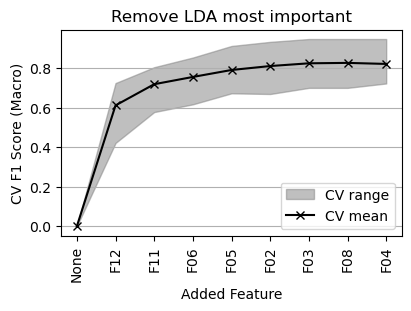

In [11]:
plot_sequential_selected_feature_scores(ids_scores,
                                        feature_col_names[ids],
                                        title="Remove LDA most important")

In [12]:
feature_ids = [0, 1, 2, 6 ,8, 9, 12]
ids, ids_scores, all_scores = do_forward_selection_cv(X,
                                                    y,
                                                    feature_ids, 
                                                    cv_outer,
                                                    pipeline,
                                                    scoring_method,
                                                    larger_score_is_better=larger_score_is_better,
                                                    verbose=True,
                                                    n_jobs=10)

0 0.4362499152214402
1 0.4051047558627351
2 0.378984522659184
6 0.593630178253482
8 0.6326273591533108
9 0.5188110064732878
12 0.6706983977065454
[12  0] 0.7537208658731684
[12  1] 0.6752211394858403
[12  2] 0.6658866714157757
[12  6] 0.780212123497628
[12  8] 0.7472452050656924
[12  9] 0.751254269660648
[12  6  0] 0.868183764219365
[12  6  1] 0.8324802361890036
[12  6  2] 0.8248079177611327
[12  6  8] 0.8183578810697615
[12  6  9] 0.8052330781407024
[12  6  0  1] 0.882403302978035
[12  6  0  2] 0.8947410122001835
[12  6  0  8] 0.8904858748382416
[12  6  0  9] 0.8645128015679401
[12  6  0  2  1] 0.8894756923931355
[12  6  0  2  8] 0.9170066412195143
[12  6  0  2  9] 0.8992350825943751
[12  6  0  2  8  1] 0.8897800017599027
[12  6  0  2  8  9] 0.9314397350032564
[12  6  0  2  8  9  1] 0.9373943903625804


[4. 3.]


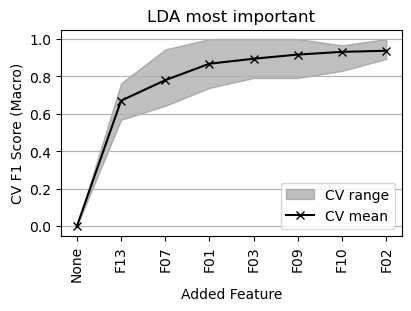

In [13]:
plot_sequential_selected_feature_scores(ids_scores,
                                        feature_col_names[ids],
                                        title="LDA most important")

In [14]:
feature_ids = [0, 6 ,8, 9, 12]
ids, ids_scores, all_scores = do_forward_selection_cv(X,
                                                    y,
                                                    feature_ids, 
                                                    cv_outer,
                                                    pipeline,
                                                    scoring_method,
                                                    larger_score_is_better=larger_score_is_better,
                                                    verbose=True,
                                                    n_jobs=10)

0 0.4362499152214402
6 0.593630178253482
8 0.6326273591533108
9 0.5188110064732878
12 0.6706983977065454
[12  0] 0.7537208658731684
[12  6] 0.780212123497628
[12  8] 0.7472452050656924
[12  9] 0.751254269660648
[12  6  0] 0.868183764219365
[12  6  8] 0.8183578810697615
[12  6  9] 0.8052330781407024
[12  6  0  8] 0.8904858748382416
[12  6  0  9] 0.8645128015679401
[12  6  0  8  9] 0.9167387594665994


[4. 3.]


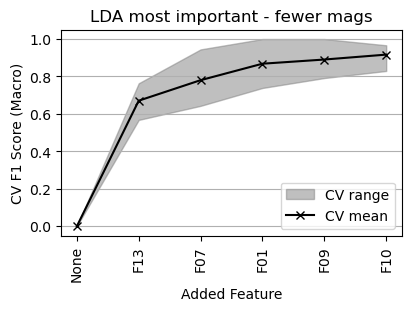

In [15]:
plot_sequential_selected_feature_scores(ids_scores,
                                        feature_col_names[ids],
                                        title="LDA most important - fewer mags")